In [1]:
from datetime import date
import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np
from textblob import TextBlob
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
import spacy
nlp = spacy.load("en_core_web_sm")

In [2]:
#hide warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Create a list to append tweet data
tweets_list = []
maxTweets = 5000

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('crypto since:2020-01-01 until:{today}').get_items()):
    if i>maxTweets:
        break
    tweets_list.append([tweet.content])
    
# Creating a dataframe from the tweets list above
tweets_to_df = pd.DataFrame(tweets_list2, columns=['Tweets'])

In [4]:
tweets_to_df.head() #lists first five tweets

,Tweets
0,If we hold current level on #BTC until today's...
1,"When I see all his losses in crypto, I strengt..."
2,Hadn't checked on my crypto portfolio in a whi...
3,#tether has moved well below the 100 line befo...
4,@DowneastCapital Client market sentiment is to...


In [5]:
#clean the tweets with a function

def cleanTweets(text):
    text = re.sub('@[A-Za-z0-9_]+', '', text) #removes @mentions
    text = re.sub('#','',text) #removes hastag '#' symbol
    text = re.sub('RT[\s]+','',text)
    text = re.sub('https?:\/\/\S+', '', text) 
    text = re.sub('\n',' ',text)
    return text

In [6]:
tweets_to_df['cleanedTweets'] = tweets_to_df['Tweets'].apply(cleanTweets) #apply cleanTweet function to the tweet

In [7]:
tweets_to_df.head() #compares original tweets with cleaned Tweets

,Tweets,cleanedTweets
0,If we hold current level on #BTC until today's...,If we hold current level on BTC until today's ...
1,"When I see all his losses in crypto, I strengt...","When I see all his losses in crypto, I strengt..."
2,Hadn't checked on my crypto portfolio in a whi...,Hadn't checked on my crypto portfolio in a whi...
3,#tether has moved well below the 100 line befo...,tether has moved well below the 100 line befor...
4,@DowneastCapital Client market sentiment is to...,Client market sentiment is to find any crypto...


In [8]:
tweets_to_df.to_csv('tweets_crypto.csv') #write dataframe into csv file

In [9]:
savedTweets = pd.read_csv('tweets_crypto.csv',index_col=0) #reads csv file


In [28]:
savedTweets.shape

(987, 5)

In [10]:
savedTweets 

,Tweets,cleanedTweets
0,If we hold current level on #BTC until today's...,If we hold current level on BTC until today's ...
1,"When I see all his losses in crypto, I strengt...","When I see all his losses in crypto, I strengt..."
2,Hadn't checked on my crypto portfolio in a whi...,Hadn't checked on my crypto portfolio in a whi...
3,#tether has moved well below the 100 line befo...,tether has moved well below the 100 line befor...
4,@DowneastCapital Client market sentiment is to...,Client market sentiment is to find any crypto...
...,...,...
982,"Top 10 rated cryptos throughout the week, unti...","Top 10 rated cryptos throughout the week, unti..."
983,@Poetry4Bitcoin Really good. Had only seen cli...,Really good. Had only seen clips up until tod...
984,"Top 10 cryptos of the past 24 hours, until tod...","Top 10 cryptos of the past 24 hours, until tod..."
985,"Top 10 rated cryptos throughout the week, unti...","Top 10 rated cryptos throughout the week, unti..."


In [11]:
#get subjectivity and polarity of tweets with a function

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#get polarity with a function
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

savedTweets['Subjectivity'] = savedTweets['cleanedTweets'].apply(getSubjectivity)
savedTweets['Polarity'] = savedTweets['cleanedTweets'].apply(getPolarity)

In [12]:
savedTweets.drop('Tweets', axis=1).head() #shows polarity and subjectivity of each tweet and drops the uncleaned tweets column

,cleanedTweets,Subjectivity,Polarity
0,If we hold current level on BTC until today's ...,0.2,0.000000
1,"When I see all his losses in crypto, I strengt...",0.4,0.100000
2,Hadn't checked on my crypto portfolio in a whi...,0.5,0.200000
3,tether has moved well below the 100 line befor...,0.3,0.200000
4,Client market sentiment is to find any crypto...,0.2,0.166667


In [14]:
#create a function to check negative, neutral and positive analysis
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score ==0:
        return 'Neutral'
    else:
        return 'Positive'
    
savedTweets['Analysis'] = savedTweets['Polarity'].apply(getAnalysis)

In [15]:
savedTweets.drop('Tweets', axis=1).head()

,cleanedTweets,Subjectivity,Polarity,Analysis
0,If we hold current level on BTC until today's ...,0.2,0.000000,Neutral
1,"When I see all his losses in crypto, I strengt...",0.4,0.100000,Positive
2,Hadn't checked on my crypto portfolio in a whi...,0.5,0.200000,Positive
3,tether has moved well below the 100 line befor...,0.3,0.200000,Positive
4,Client market sentiment is to find any crypto...,0.2,0.166667,Positive


In [48]:
savedTweets[savedTweets['Analysis']=='Positive']

,Tweets,cleanedTweets,Subjectivity,Polarity,Analysis
1,"When I see all his losses in crypto, I strengt...","When I see all his losses in crypto, I strengt...",0.400000,0.100000,Positive
2,Hadn't checked on my crypto portfolio in a whi...,Hadn't checked on my crypto portfolio in a whi...,0.500000,0.200000,Positive
3,#tether has moved well below the 100 line befo...,tether has moved well below the 100 line befor...,0.300000,0.200000,Positive
4,@DowneastCapital Client market sentiment is to...,Client market sentiment is to find any crypto...,0.200000,0.166667,Positive
5,@SirajMansour @CmidasFx @Timeless_Crypto @stab...,"Pls keep in mind, if ya didn't sell ya did...",0.517857,0.392857,Positive
...,...,...,...,...,...
982,"Top 10 rated cryptos throughout the week, unti...","Top 10 rated cryptos throughout the week, unti...",0.525000,0.425000,Positive
983,@Poetry4Bitcoin Really good. Had only seen cli...,Really good. Had only seen clips up until tod...,0.675000,0.208333,Positive
984,"Top 10 cryptos of the past 24 hours, until tod...","Top 10 cryptos of the past 24 hours, until tod...",0.433333,0.200000,Positive
985,"Top 10 rated cryptos throughout the week, unti...","Top 10 rated cryptos throughout the week, unti...",0.525000,0.425000,Positive


In [16]:
savedTweets['Analysis'].value_counts() #shows the counts of tweets' polarity

Positive    595
Neutral     206
Negative    186
Name: Analysis, dtype: int64

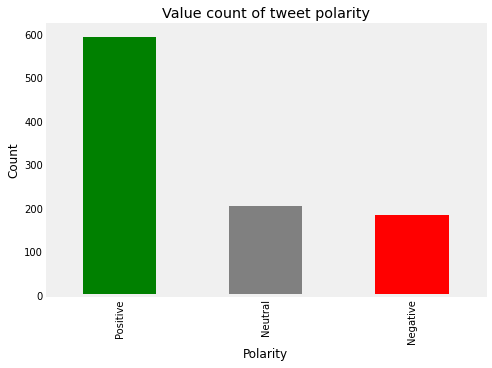

In [31]:
#plot a bar graph to show count of tweet sentiment
fig = plt.figure(figsize=(7,5))
#xlabel = ['Positive','Negative','Neutral']
#plt.bar(xlabel,savedTweets['Analysis'].value_counts(), color = color)
color = ['green','grey','red']
savedTweets['Analysis'].value_counts().plot(kind='bar',color = color)
plt.title('Value count of tweet polarity')
plt.ylabel('Count')
plt.xlabel('Polarity')
plt.grid(False)
plt.show()

Text(0.5, 1.0, 'Distribution of polarity')

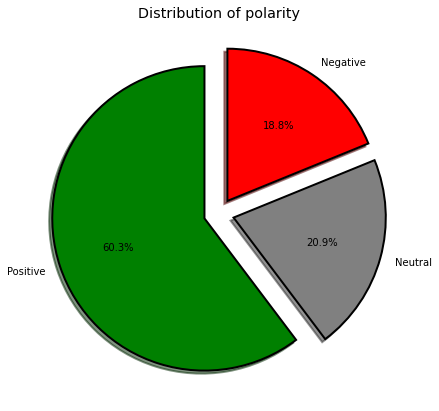

In [33]:
#pie chart to show percentage distribution of polarity
fig = plt.figure(figsize=(7,7))
colors = ('green', 'grey', 'red')
wp={'linewidth':2, 'edgecolor': 'black'}
tags=savedTweets['Analysis'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors, 
         startangle=90, wedgeprops=wp, explode=explode, label='')
plt.title('Distribution of polarity')

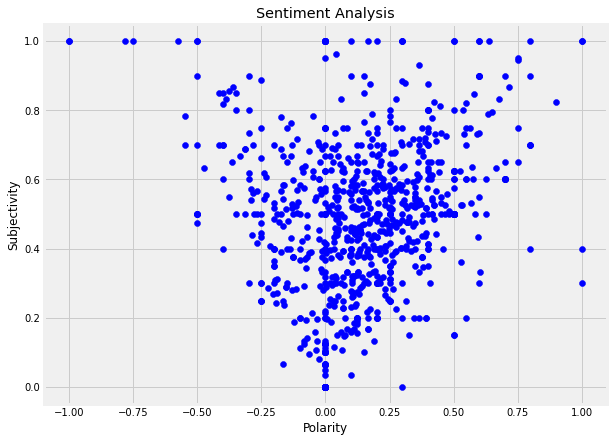

In [19]:
#plot the polarity and subjectivity on a scatter plot
plt.figure(figsize=(9,7))
for i in range(0,savedTweets.shape[0]):
    plt.scatter(savedTweets['Polarity'][i],savedTweets['Subjectivity'][i], color='blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
#create a function for wordcloud
def create_wordcloud(text):    
    allWords = ' '.join([tweets for tweets in text])
    wordCloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(allWords)
    plt.figure(figsize=(20,10))
    plt.imshow(wordCloud)
    plt.axis('off')
    plt.show()

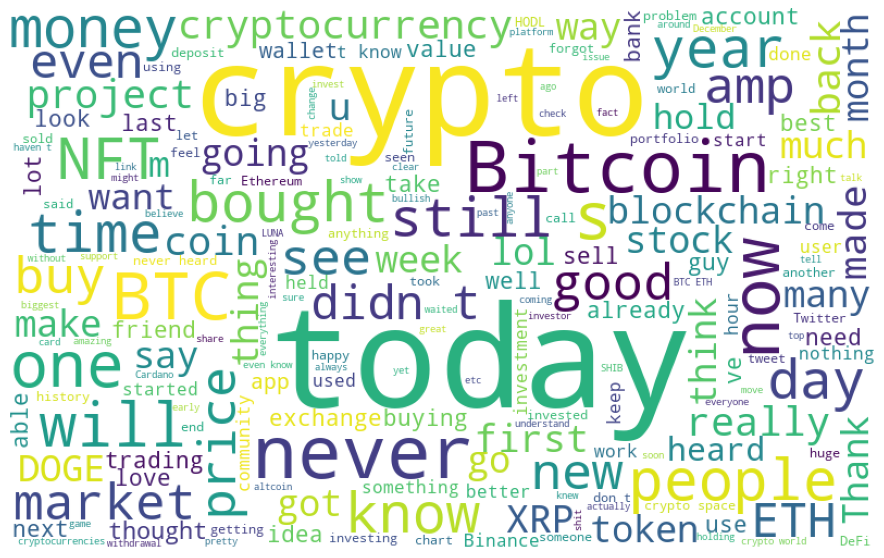

In [79]:
#plot wordcloud for all tweets
allTweets = savedTweets['cleanedTweets']
create_wordcloud(allTweets)

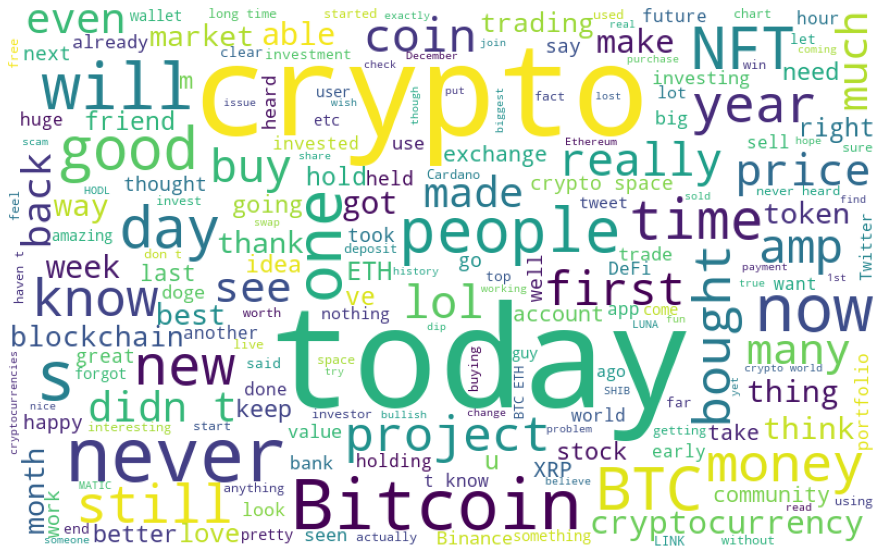

In [80]:
#create wordcloud for positive tweets
posTweets = savedTweets.loc[savedTweets['Analysis']=='Positive', 'cleanedTweets']
create_wordcloud(posTweets)
    

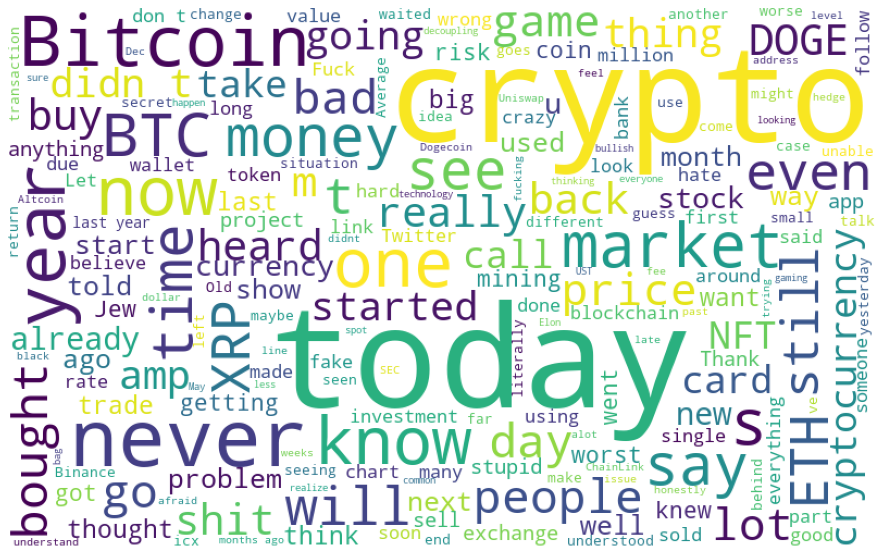

In [78]:
#plot wordcloud for negative tweets
negTweets = savedTweets.loc[savedTweets['Analysis']=='Negative', 'cleanedTweets']
create_wordcloud(negTweets)

In [20]:
savedTweets.shape[0] #shows total rows of tweets

987

In [21]:
# get the percentage of positive tweets
pTweets = savedTweets[savedTweets['Analysis']=='Positive']
pTweets = pTweets['cleanedTweets']
percentage = round((pTweets.shape[0]/savedTweets.shape[0]) *100,1)
print('Percentage of positive tweets: {0}%'.format(percentage))


Percentage of positive tweets: 60.3%


In [22]:
# get the percentage of negative tweets
nTweets = savedTweets[savedTweets['Analysis']=='Negative']
nTweets = nTweets['cleanedTweets']
percentage = round((nTweets.shape[0]/savedTweets.shape[0]) *100,1)
print('Percentage of negative tweets: {0}%'.format(percentage))

Percentage of negative tweets: 18.8%


In [83]:
#break each tweet sentence into words
sentences = []
for word in savedTweets['cleanedTweets']:
    sentences.append(word)
sentences

lines = list()
for line in sentences:
    words = line.split()
    for w in words:
        lines.append(w)
lines[:10]

['If',
 'we',
 'hold',
 'current',
 'level',
 'on',
 'BTC',
 'until',
 "today's",
 'closure']

In [24]:
#stemming all the words to their root word
stemmer = SnowballStemmer(language='english')
stem=[]
for word in lines:
    stem.append(stemmer.stem(word))
stem[:20]


['if',
 'we',
 'hold',
 'current',
 'level',
 'on',
 'btc',
 'until',
 'today',
 'closur',
 'i',
 'expect',
 'someth',
 'like',
 'this',
 'for',
 'the',
 'next',
 'two',
 'months.']

In [25]:
#removes stopwords (very common words in a sentence)
stem2 = []
for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)
#stem2[:20]

In [26]:
#creates a new dataframe for the stem
df = pd.DataFrame(stem2)
df=df[0].value_counts()
df

crypto           771
today            464
today.           326
today,           146
bitcoin          113
                ... 
ubisoft...th       1
shift.             1
crypto-betray      1
guis               1
prediction.        1
Name: 0, Length: 5731, dtype: int64

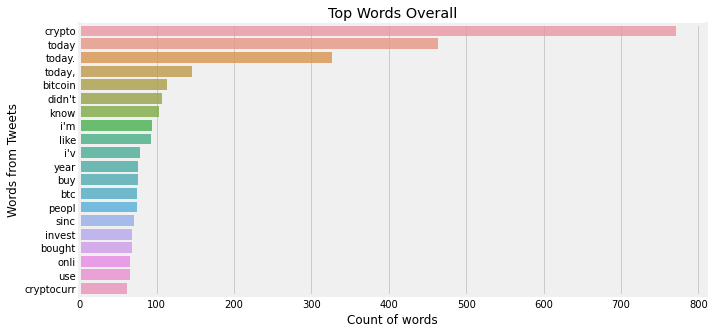

In [85]:
#plots the top 20 used words
df = df[:20]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Words Overall')
plt.xlabel('Count of words', fontsize=12)
plt.ylabel('Words from Tweets', fontsize=12)
plt.show()